# Compute Distances between Cell Centroids

<AxesSubplot:>

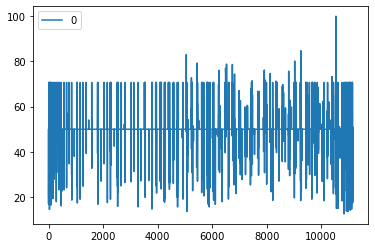

In [2]:
import clearwater_riverine_functions as cw
import numpy as np
import pandas as pd

# HEC-RAS input file
infile = '../tests/input_files/Muncie.p04.hdf'

# Read data
faces_cell_indexes_df = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Faces Cell Indexes')
cells_center_coordinate = cw.read_dataset_pandas(infile, 'Geometry/2D Flow Areas/2D Interior Area/Cells Center Coordinate')

# Compute centroid distances
nfaces = faces_cell_indexes_df.shape[0]
cell0_arr = faces_cell_indexes_df['Cell 0'].values
cell1_arr = faces_cell_indexes_df['Cell 1'].values
x_arr = cells_center_coordinate['X'].values
y_arr = cells_center_coordinate['Y'].values

centroid_distances = np.zeros(nfaces)
for face in range(nfaces):
    cell0 = cell0_arr[face]
    cell1 = cell1_arr[face]
    x0 = x_arr[cell0]
    x1 = x_arr[cell1]
    y0 = y_arr[cell0]
    y1 = y_arr[cell1]
    centroid_distances[face] = cw.dist(x0, x1, y0, y1)

# Show data
centroid_distances_df = pd.DataFrame(centroid_distances)
centroid_distances_df.plot()